In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
import osmnx
import openrouteservice
from folium.map import *
from openrouteservice import client
import numpy as np
from folium.plugins import HeatMap
import branca.colormap as cm 
from collections import defaultdict

#from google.colab import drive
#drive.mount('/content/drive')

mapping_name_coords = pd.read_csv('data/mapping_name_coords.csv', sep=',')

#Random, mudar depois para previsao
mapping_name_coords['randNumCol'] = np.random.randint(0, 5000, mapping_name_coords.shape[0])/5000

mapping_name_coords['coordinates'] = mapping_name_coords['coordinates'].str.replace('(', '').str.replace(')', '').str.replace('\'', '')
mapping_name_coords[['latitude','longitude']] = mapping_name_coords.coordinates.str.split(",",expand=True,).astype(float)

mapping_name_coords


,Unnamed: 0,name,coordinates,freguesia,concelho,cidade,randNumCol,latitude,longitude
0,0,image0,"38.73277225961562, -9.172048739336",Campolide,Lisboa,Lisboa,0.0914,38.732772,-9.172049
1,1,image1,"38.76039827177381, -9.190202095966573",Carnide,Lisboa,Lisboa,0.2826,38.760398,-9.190202
2,2,image10,"38.7439627, -9.1136023",Marvila,Lisboa,Lisboa,0.2160,38.743963,-9.113602
3,3,image100,"38.77974496618023, -9.124785817496566",Olivais,Lisboa,Lisboa,0.9766,38.779745,-9.124786
4,4,image1000,"38.7754189, -9.1708593",Lumiar,Lisboa,Lisboa,0.0508,38.775419,-9.170859
...,...,...,...,...,...,...,...,...,...
2495,2495,votingImage995,"38.73844792547146, -9.136083471008174",None,Lisboa,Lisboa,0.0108,38.738448,-9.136083
2496,2496,votingImage996,"38.740054, -9.1913993",Benfica,Lisboa,Lisboa,0.1698,38.740054,-9.191399
2497,2497,votingImage997,"38.7626013, -9.1300163",São João de Brito,Lisboa,Lisboa,0.1890,38.762601,-9.130016
2498,2498,votingImage998,"38.7679489, -9.161832993873306",Lumiar,Lisboa,Lisboa,0.0118,38.767949,-9.161833


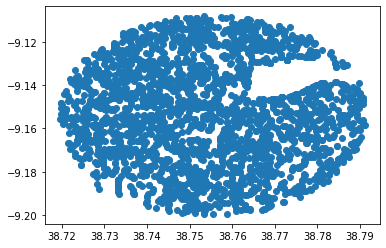

In [2]:
plt.scatter(mapping_name_coords['latitude'], mapping_name_coords['longitude'])

In [3]:
m = folium.Map(location=[38.7071,-9.13549], zoom_start=14)

In [4]:
#ColorMap
steps=20
color_map=cm.linear.YlOrRd_09.scale(mapping_name_coords['randNumCol'].min(), mapping_name_coords['randNumCol'].max()).to_step(steps)

MAX_VALUE = mapping_name_coords['randNumCol'].max()
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[MAX_VALUE/steps*i] = color_map.rgb_hex_str(MAX_VALUE/steps*i)

In [8]:
gradient_map

defaultdict(dict,
            {0.0: '#ffffcc',
             0.04999: '#ffffcc',
             0.09998: '#fff8ba',
             0.14997: '#fff0a7',
             0.19996: '#ffe895',
             0.24995: '#ffe083',
             0.29994: '#fed572',
             0.34993: '#fec560',
             0.39992: '#feb44e',
             0.44991: '#fea546',
             0.4999: '#fe953f',
             0.54989: '#fd8038',
             0.59988: '#fd6530',
             0.64987: '#fb4b29',
             0.69986: '#f13523',
             0.74985: '#e61f1d',
             0.79984: '#d7111f',
             0.84983: '#c70623',
             0.89982: '#b40026',
             0.94981: '#9a0026'})

In [10]:
tmp = list(zip(
    mapping_name_coords.latitude.values,
    mapping_name_coords.longitude.values,
    mapping_name_coords.randNumCol.values
))

In [31]:
m = folium.Map(location=[38.7071,-9.13549], zoom_start=14)

#Heatmap

heatmap = HeatMap(tmp, gradient = gradient_map, radius = 10, max_zoom=1)
color_map.add_to(m) #add color bar at the top of the map
heatmap.add_to(m)

In [32]:

m

In [ ]:
mapping_name_coords['randNumCol'].mean(),

In [ ]:
####TESTES IMAGENS######


#Upload Images (1º só 1 imagem)

import os
from ipywidgets import Image, Layout

image_data = {}
for img_filename in os.listdir('/content/drive/MyDrive/WDL/images'):
    image_name = img_filename.split('angle')[0]
    with open(f"/content/drive/MyDrive/WDL/images/{img_filename}", "rb") as f:
        b = f.read()
        image_data[image_name] = b



#Exemplo image1

image_widget = Image(
    value=image_data['image1'],
    layout=Layout(height='252px', width='400px')
)
image_widget